# Decision Tree
Build a decison tree to predict the quality of github profiles

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import os
dp = os.environ.get('pub_data')
plt.style.use('default')

In [4]:
# Read dataset
df = pd.read_csv(dp+ 'giteval.csv',index_col=0)
print(len(df))
df.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.0
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.0
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.5
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.0
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.0


In [5]:
features = ['repos','stars','followers','following','foll_ratio','n_lang','org_flag','n_cont','last_cont','stab_cont','cont_repo_ratio']
X = df[features]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state = 100)

# Fitting the model
dtree = DecisionTreeRegressor(min_samples_leaf=10).fit(X_train,y_train)

0.2955063346495719


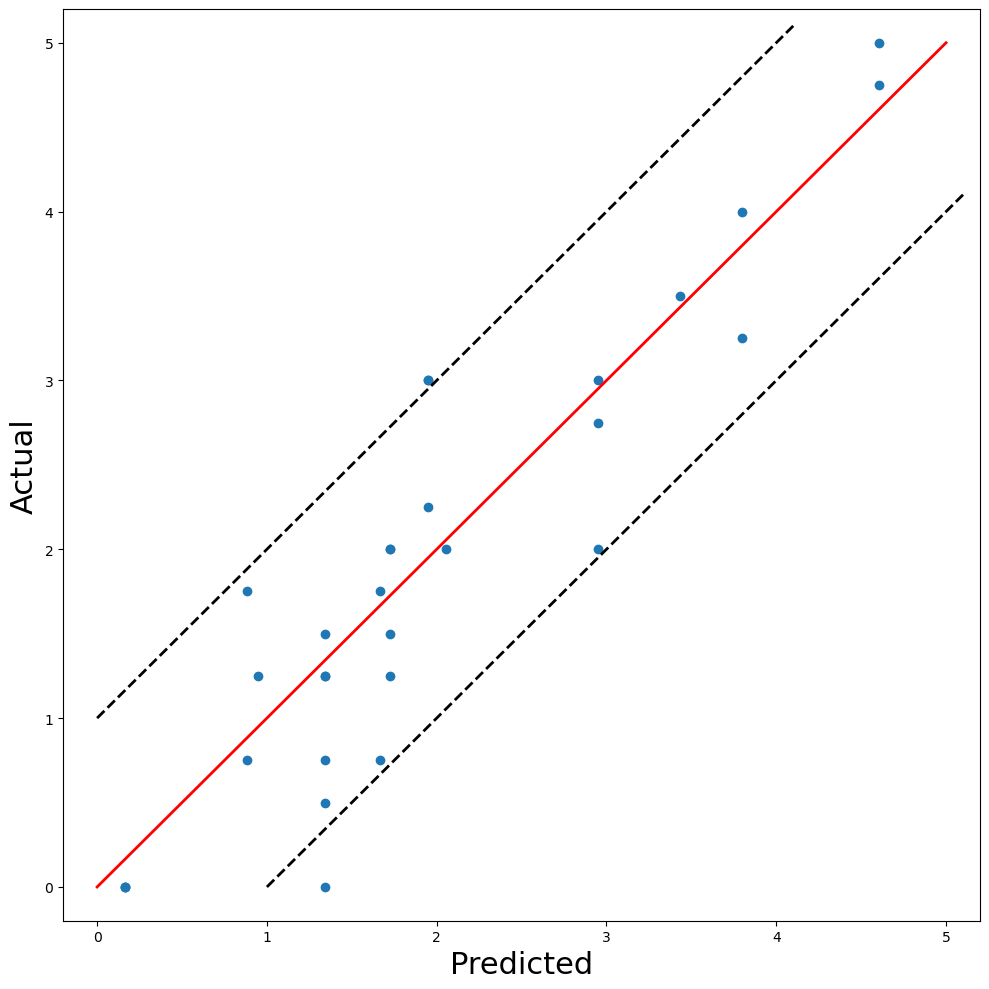

In [7]:
# Get predictions
predictions = dtree.predict(X_test)

# Calculate MSE 
print(mean_squared_error(y_test,predictions))

# Plot of actual vs predicted 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.plot(predictions,y_test,'o')
plt.plot([0, 4.1], [1, 5.1], color='black',linestyle='--', lw=2)
plt.plot([0, 5], [0, 5], 'r-', lw=2)
plt.plot([1, 5.1], [0, 4.1], color='black',linestyle='--', lw=2)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.ylim((-0.2,5.2))
plt.xlim((-0.2,5.2))
plt.tight_layout()
plt.savefig('../../figures/dtree_fit.png',format='png',dpi=150)

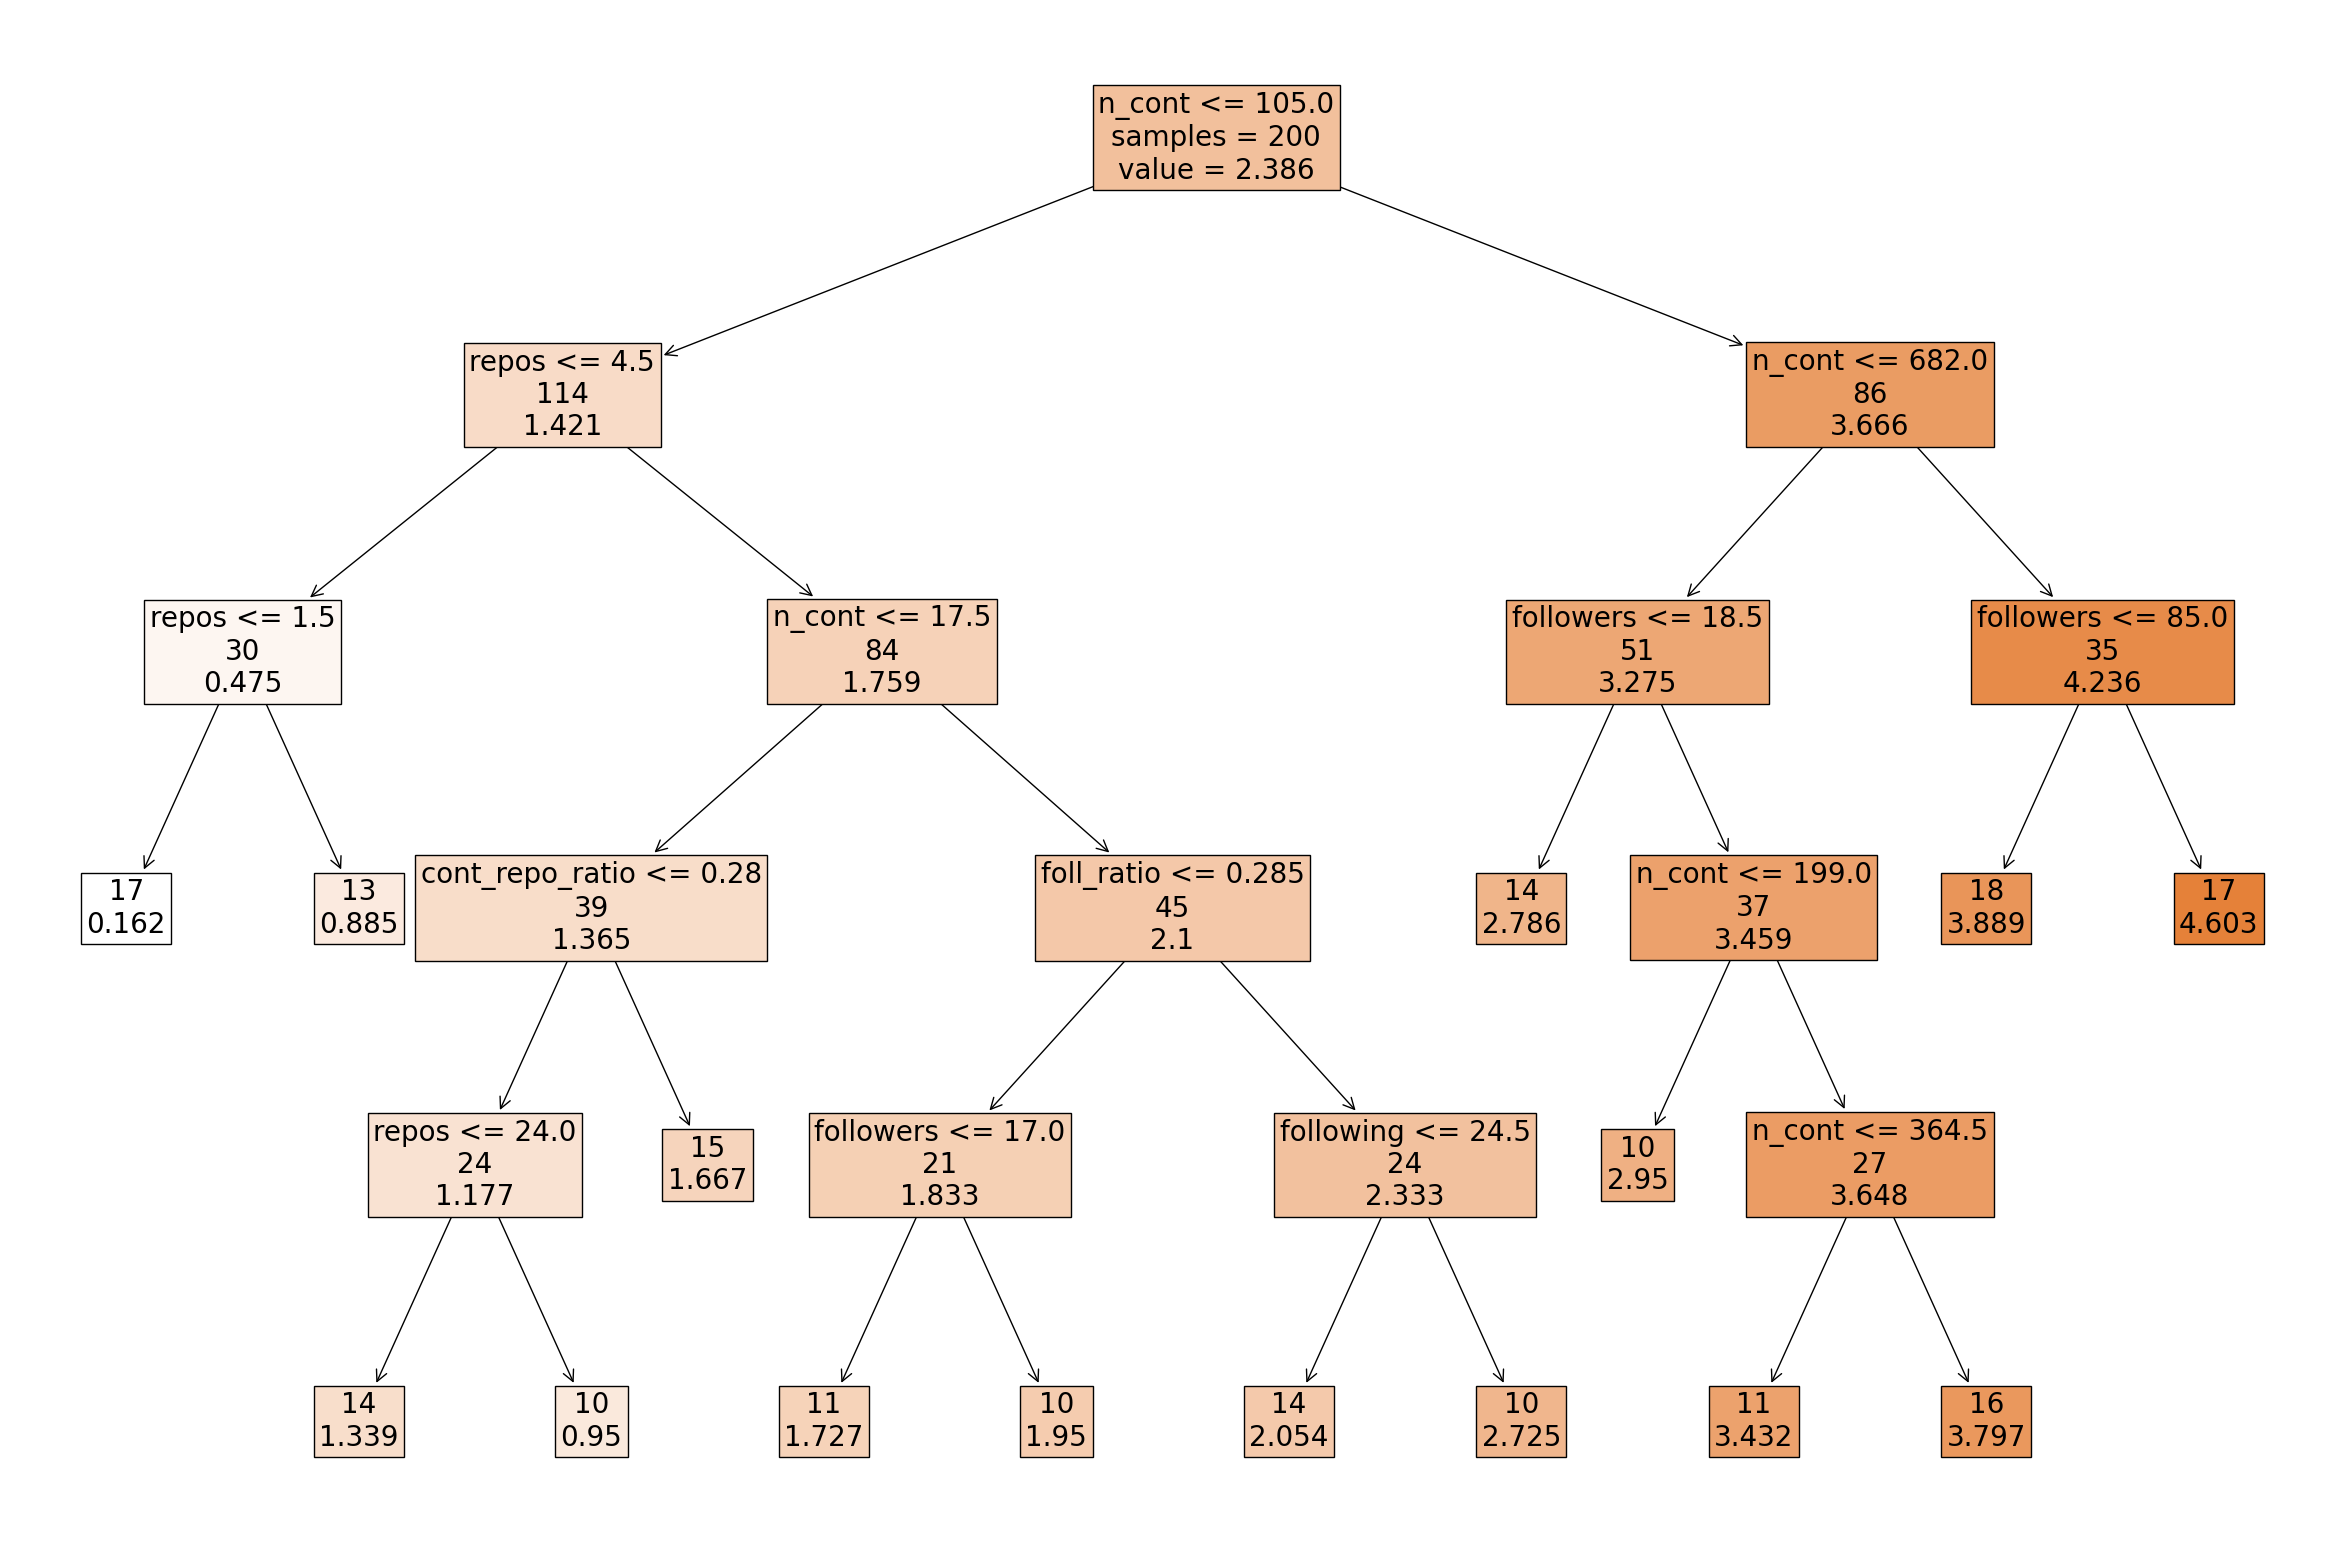

In [8]:
# Visualise tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(dtree, 
               feature_names=features,  
               filled=True,
               label = 'root',
               impurity=False,
               fontsize=20)

#plt.tight_layout()
fig.savefig('../../figures/dtree.png')